In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load dataset
df = pd.read_csv('CrimesOnWomenData.csv')
data_desc = pd.read_csv('description.csv')

In [8]:
df.head(5)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [9]:
data_desc

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


In [10]:
df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df.head(2)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0


In [12]:
df.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


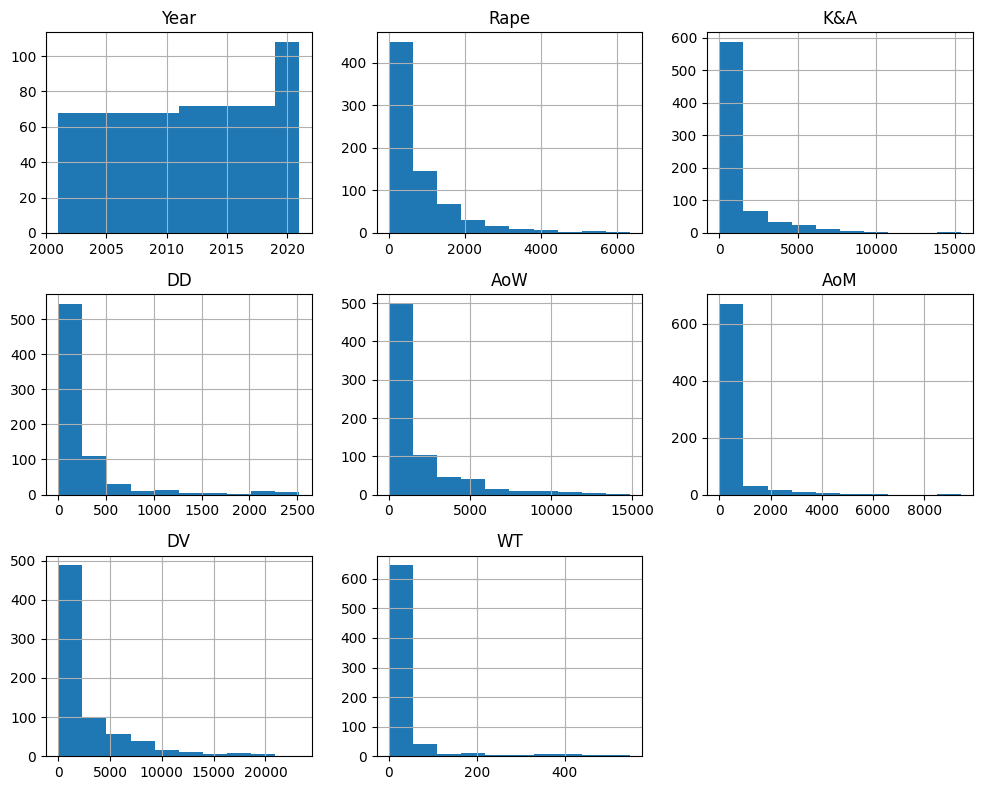

In [16]:
# Histogram for each crime type
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

<Axes: >

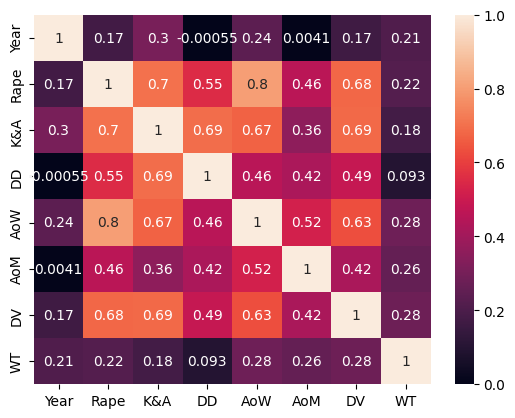

In [19]:
sns.heatmap(df.drop(columns='State').corr(),annot=True)

In [21]:
df.groupby('Year')['State'].count()

Year
2001    34
2002    34
2003    34
2004    34
2005    34
2006    34
2007    34
2008    34
2009    34
2010    34
2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    36
2018    36
2019    36
2020    36
2021    36
Name: State, dtype: int64

In [22]:
df.groupby('Year')['State'].nunique()

Year
2001    34
2002    34
2003    34
2004    34
2005    34
2006    34
2007    34
2008    34
2009    34
2010    34
2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    36
2018    36
2019    36
2020    36
2021    36
Name: State, dtype: int64

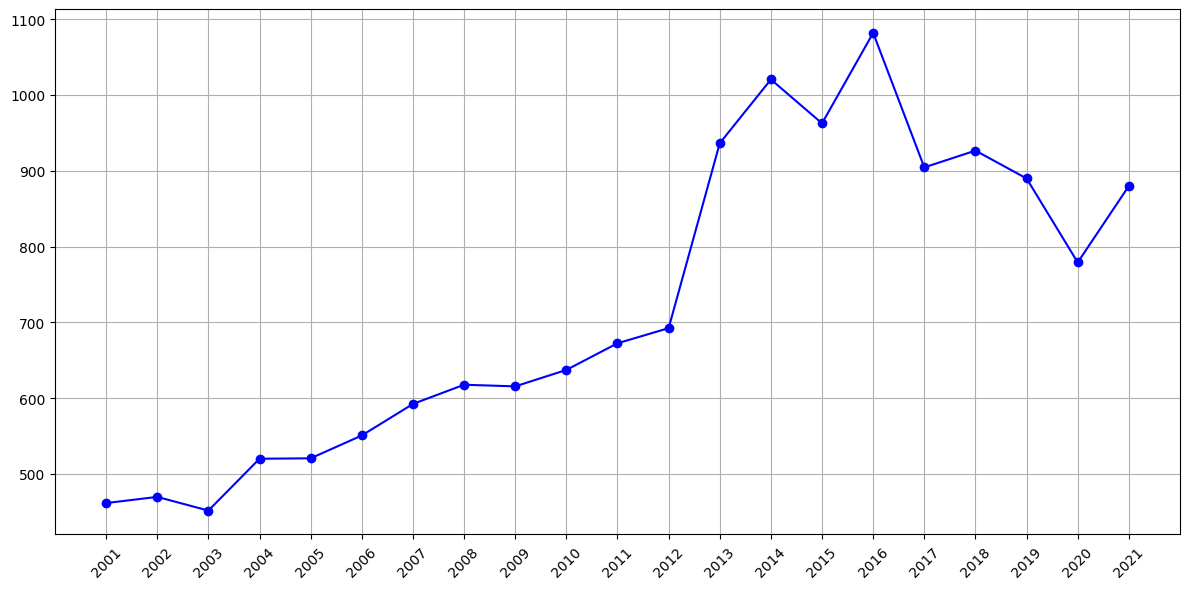

In [23]:
# Average cases of Rape in the country year wise
avg_rape_per_year = df.groupby('Year')['Rape'].mean()

# Creating the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_rape_per_year.index, avg_rape_per_year.values, marker='o', color='b', label='Average Rape Cases')
plt.grid(True)

plt.xticks(ticks=avg_rape_per_year.index, rotation=45)

plt.tight_layout()  
plt.show()

In [24]:
highest_rape_cases = df.loc[df.groupby('Year')['Rape'].idxmax()]
highest_rape_cases[['Year', 'State', 'Rape']]

,Year,State,Rape
13,2001,MADHYA PRADESH,2851
47,2002,MADHYA PRADESH,2891
81,2003,MADHYA PRADESH,2738
115,2004,MADHYA PRADESH,2875
149,2005,MADHYA PRADESH,2921
183,2006,MADHYA PRADESH,2900
217,2007,MADHYA PRADESH,3010
251,2008,MADHYA PRADESH,2937
285,2009,MADHYA PRADESH,2998
319,2010,MADHYA PRADESH,3135


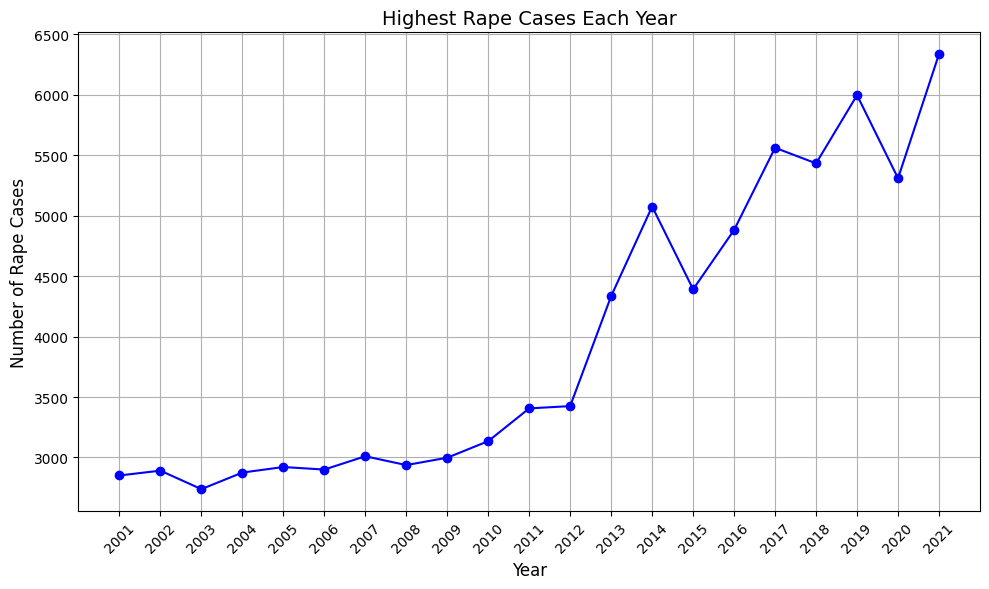

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(highest_rape_cases['Year'], highest_rape_cases['Rape'], marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rape Cases', fontsize=12)
plt.title('Highest Rape Cases Each Year', fontsize=14)

plt.grid(True)

plt.xticks(ticks=highest_rape_cases['Year'], rotation=45)

plt.tight_layout()  
plt.show()

In [27]:
lowest_rape_cases = df.loc[df.groupby('Year')['Rape'].idxmin()]
lowest_rape_cases[['Year', 'State', 'Rape']]

,Year,State,Rape
31,2001,DAMAN & DIU,0
65,2002,DAMAN & DIU,0
98,2003,D & N HAVELI,1
134,2004,LAKSHADWEEP,0
168,2005,LAKSHADWEEP,0
202,2006,LAKSHADWEEP,0
235,2007,DAMAN & DIU,1
269,2008,DAMAN & DIU,0
303,2009,DAMAN & DIU,1
338,2010,LAKSHADWEEP,0


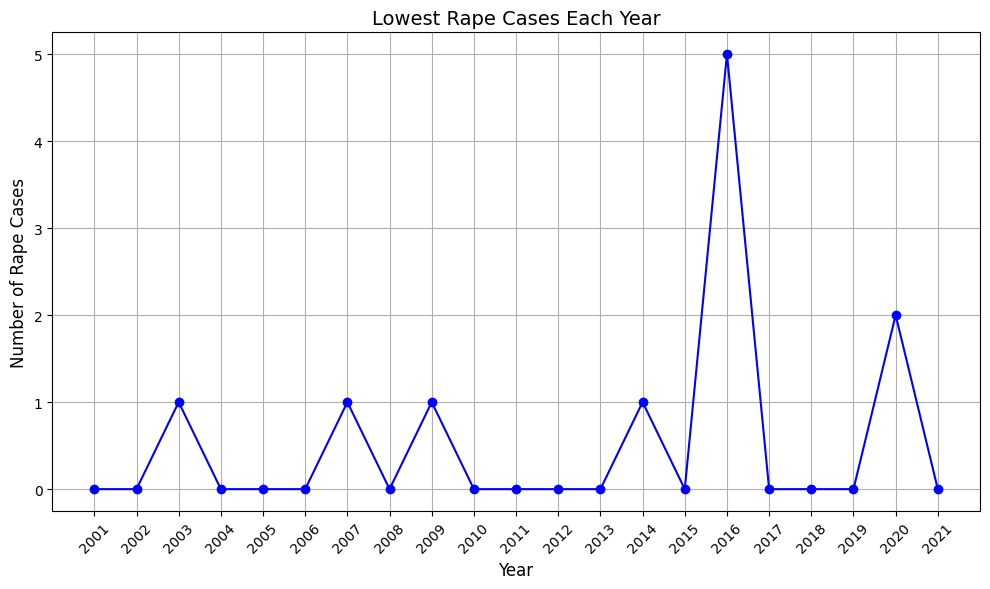

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(lowest_rape_cases['Year'], lowest_rape_cases['Rape'], marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Rape Cases', fontsize=12)
plt.title('Lowest Rape Cases Each Year', fontsize=14)

plt.grid(True)

plt.xticks(ticks=lowest_rape_cases['Year'], rotation=45)

plt.tight_layout()  
plt.show()